In [ ]:
# import necessary libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image ,ImageFilter ,ImageEnhance
from albumentations.pytorch import ToTensorV2
import albumentations as A
import cv2
import os


In [ ]:
faces=pd.read_csv("faces.csv") # read the file 
faces.head()

image_name  width  height   x0   y0    x1   y1
0  00001722.jpg   1333    2000  490  320   687  664
1  00001044.jpg   2000    1333  791  119  1200  436
2  00001050.jpg    667    1000  304  155   407  331
3  00001736.jpg    626     417  147   14   519  303
4  00003121.jpg    626     418  462   60   599  166

In [ ]:
faces.duplicated().sum() # check duplicates in dataset

0

In [ ]:
faces.isnull().sum() # check null values

image_name    0
width         0
height        0
x0            0
y0            0
x1            0
y1            0
dtype: int64

In [ ]:
faces.info() # dataset summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3350 entries, 0 to 3349
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_name  3350 non-null   object
 1   width       3350 non-null   int64 
 2   height      3350 non-null   int64 
 3   x0          3350 non-null   int64 
 4   y0          3350 non-null   int64 
 5   x1          3350 non-null   int64 
 6   y1          3350 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 183.3+ KB


In [ ]:
# image names are set in ascending order
faces = faces.sort_values(by="image_name").reset_index(drop=True)

In [ ]:
faces["image_name"]

0       00000003.jpg
1       00000004.jpg
2       00000005.jpg
3       00000006.jpg
4       00000008.jpg
            ...     
3345    00003514.jpg
3346    00003517.jpg
3347    00003517.jpg
3348    00003517.jpg
3349    00003517.jpg
Name: image_name, Length: 3350, dtype: object

In [ ]:
faces['class_labels']='face' # adding the label

In [ ]:
faces.head(10)

image_name  width  height    x0   y0    x1    y1 class_labels
0  00000003.jpg    500     350   101   25   176    87         face
1  00000004.jpg   1000    1241   476  177   588   335         face
2  00000005.jpg   1300     957   811  171   976   313         face
3  00000006.jpg   2667    4000  1002  787  1547  1739         face
4  00000008.jpg   1300     867   820  234  1016   387         face
5  00000011.jpg   4256    2832  1481  830  2110  1317         face
6  00000012.jpg    600     400   183   73   402   243         face
7  00000015.jpg   1333    2000   471  315   774   845         face
8  00000018.jpg    800     534   131   30   628   408         face
9  00000020.jpg   1000     667   288   20   516   193         face

In [ ]:
def cleaned(face):
# Ensure bounding boxes are within image dimensions
    face['x0'] = face[['x0', 'width']].min(axis=1)  # Ensure x0 does not exceed width
    face['y0'] = face[['y0', 'height']].min(axis=1)  # Ensure y0 does not exceed height
    face['x1'] = face[['x1', 'width']].min(axis=1)  # Ensure x1 does not exceed width
    face['y1'] = face[['y1', 'height']].min(axis=1)  # Ensure y1 does not exceed height

    # Ensure x1 > x0 and y1 > y0
    face = face[face['x1'] > face['x0']]
    face= face[face['y1'] > face['y0']]

    return face
print(cleaned(faces))

        image_name  width  height    x0   y0    x1    y1 class_labels
0     00000003.jpg    500     350   101   25   176    87         face
1     00000004.jpg   1000    1241   476  177   588   335         face
2     00000005.jpg   1300     957   811  171   976   313         face
3     00000006.jpg   2667    4000  1002  787  1547  1739         face
4     00000008.jpg   1300     867   820  234  1016   387         face
...            ...    ...     ...   ...  ...   ...   ...          ...
3345  00003514.jpg    236     354    93   37   133   106         face
3346  00003517.jpg    236     236    81   40   160   132         face
3347  00003517.jpg    236     236   162   71   215   134         face
3348  00003517.jpg    236     236    36   14   104    92         face
3349  00003517.jpg    236     236    88  122   127   169         face

[3350 rows x 8 columns]


In [ ]:
faces.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3350 entries, 0 to 3349
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   image_name    3350 non-null   object
 1   width         3350 non-null   int64 
 2   height        3350 non-null   int64 
 3   x0            3350 non-null   int64 
 4   y0            3350 non-null   int64 
 5   x1            3350 non-null   int64 
 6   y1            3350 non-null   int64 
 7   class_labels  3350 non-null   object
dtypes: int64(6), object(2)
memory usage: 209.5+ KB


# MAPPING THE IMAGES AND ANNOTATIONS

In [ ]:
faces.to_csv("annotation.csv",index=False)

In [4]:
images="images"
anots="annotation.csv"

anot=pd.read_csv(anots)

In [ ]:
# Define output directory
output = "/content/drive/MyDrive/project mini/Human Face Detection/mapped_images_800"

# Create output folder if it doesn't exist
os.makedirs(output, exist_ok=True)

# Set target dimensions for resizing
target_width, target_height = 800, 800

# Group annotations by image name
group_the_annotation = anot.groupby("image_name")

# Iterate through each image and its annotations
for img_name, annotation in group_the_annotation:
    img_path = os.path.join(images, img_name)

    # Read the image
    image = cv2.imread(img_path)

    # Handle errors if image is missing
    if image is None:
        print(f"Error in loading {img_name}")
        continue

    # Get original image dimensions
    org_height, org_width = image.shape[:2]

    # Resize the image to the target size
    resized_image = cv2.resize(image, (target_width, target_height))

    # Calculate scaling factors
    scale_width = target_width / org_width
    scale_height = target_height / org_height

    # Draw bounding boxes on resized image
    for _, annot_row in annotation.iterrows():
        x0 = int(annot_row["x0"] * scale_width)
        y0 = int(annot_row["y0"] * scale_height)
        x1 = int(annot_row["x1"] * scale_width)
        y1 = int(annot_row["y1"] * scale_height)
        label = annot_row["class_labels"]

        # Draw rectangle (bounding box)
        cv2.rectangle(resized_image, (x0, y0), (x1, y1), (0, 255, 0), 2)

        # Put label text above the bounding box
        cv2.putText(resized_image, label, (x0, y0 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

    # Save the annotated and resized image
    output_path = os.path.join(output, img_name)
    cv2.imwrite(output_path, resized_image)

    # Print success message
    print(f"Saved: {img_name}")




saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
save

In [ ]:
print(len(os.listdir(output)))

2164


In [ ]:
# Define the path of the resized (mapped) images
mapped = "/content/drive/MyDrive/project mini/Human Face Detection/mapped_images_800"

# Define the path to save augmented images
augmented_dir = "/content/drive/MyDrive/project mini/Human Face Detection/dataset/imagesn"
os.makedirs(augmented_dir, exist_ok=True)  # Create the directory if it doesn't exist

# Loop through each image in the mapped directory
for image_name in os.listdir(mapped):
    image_path = os.path.join(mapped, image_name)  # Build the full image path

    image = cv2.imread(image_path)  # Load the image using OpenCV

    # If the image couldn't be loaded, skip it
    if image is None:
        print(f"Error loading image: {image_name}")
        continue

    # Normalize the image pixels to range [0,1] (important for Albumentations)
    image = image.astype(np.float32) / 255.0

    # Define face-friendly data augmentations using Albumentations
    face_transforms = A.Compose([
        A.HorizontalFlip(p=0.5),  # Flip the image horizontally with 50% chance
        A.Rotate(limit=10, border_mode=0, p=0.3),  # Slight rotation within ±10 degrees
        A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.05, rotate_limit=10, border_mode=0, p=0.3),  # Slight shifting, scaling, and rotating
        A.RandomBrightnessContrast(brightness_limit=0.3, contrast_limit=0.3, p=0.4),  # Random brightness and contrast change
        A.RGBShift(r_shift_limit=10, g_shift_limit=10, b_shift_limit=10, p=0.4),  # Slight color shifting in R, G, B channels
    ])

    # Apply the defined augmentations
    augmentedd = face_transforms(image=image)["image"]

    # Convert the image back to uint8 (0–255) for saving
    augmented = (augmentedd * 255).astype(np.uint8)

    # Build the saving path and save the augmented image
    save_path = os.path.join(augmented_dir, f"{image_name}")
    cv2.imwrite(save_path, augmented)

    # Print success message
    print(f"Processed {image_name} with shape {image.shape}")



Streaming output truncated to the last 5000 lines.
  [ 0  7  7]
  [ 0  8  8]]]
Processed 00000220.jpg with shape (800, 800, 3)[[[ 45  84  59]
  [ 47  83  59]
  [ 44  80  58]
  ...
  [  0 165 223]
  [  1 167 226]
  [  5 168 230]]

 [[ 45  84  59]
  [ 45  84  59]
  [ 45  81  59]
  ...
  [  0 167 225]
  [  2 168 229]
  [  5 168 230]]

 [[ 46  85  60]
  [ 47  86  61]
  [ 48  84  62]
  ...
  [  0 169 227]
  [  5 168 230]
  [  7 168 230]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
Processed 00000222.jpg with shape (800, 800, 3)[[[251 251 251]
  [251 251 251]
  [251 251 251]
  ...
  [240 219 192]
  [238 217 190]
  [238 217 190]]

 [[251 251 251]
  [251 251 251]
  [251 251 251]
  ...
  [240 219 192]
  [238 217 190]
  [237 

## EXPLORATORY DATA ANALYSIS


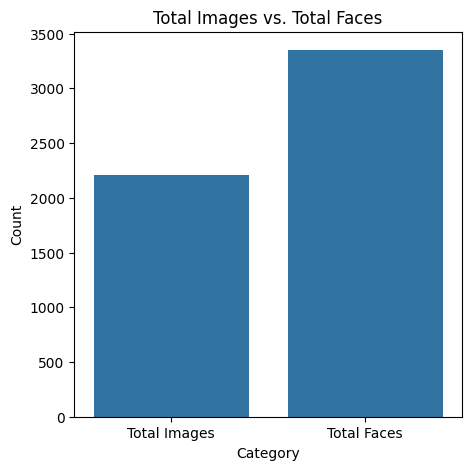

In [ ]:

# Calculate the values
total_images = anot["image_name"].nunique()
total_faces = len(anot)

# Prepare data for bar plot
counts = pd.DataFrame({"Category": ["Total Images", "Total Faces"],
                       "Count": [total_images, total_faces]})

plt.figure(figsize=(5, 5))
sns.barplot(x="Category", y="Count", data=counts)
plt.title("Total Images vs. Total Faces")
plt.ylabel("Count")
plt.show()


In [5]:
faces_per_image = anot.groupby("image_name")["image_name"].transform("count")
print(f"Average faces per image: {faces_per_image.mean():.2f}")
print(f"Maximum faces in a single image: {faces_per_image.max()}")
print(f"Minimum faces in a single image: {faces_per_image.min()}")

Average faces per image: 2.58
Maximum faces in a single image: 12
Minimum faces in a single image: 1


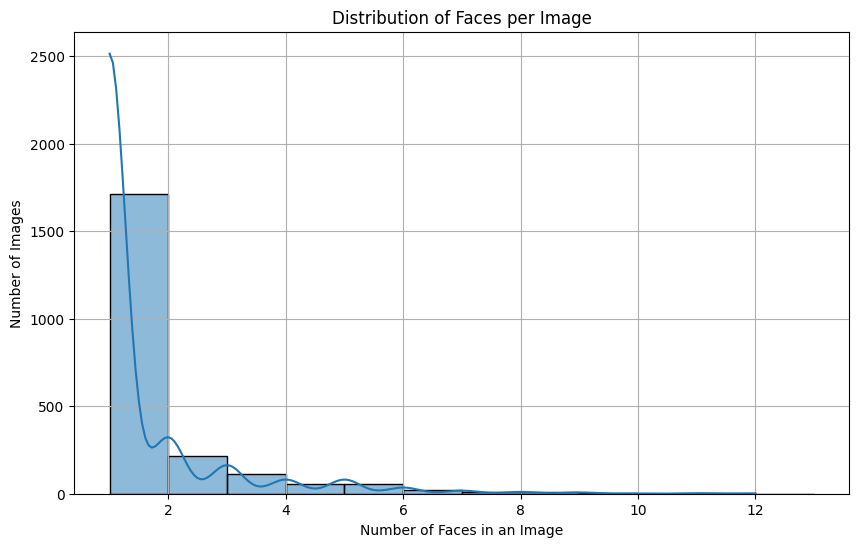

In [ ]:


# First: get unique faces per image
faces_count_per_image = anot.groupby("image_name").size()

# Now plot
plt.figure(figsize=(10, 6))
sns.histplot(faces_count_per_image, bins=range(1, faces_count_per_image.max() + 2), kde=True)

plt.title("Distribution of Faces per Image")
plt.xlabel("Number of Faces in an Image")
plt.ylabel("Number of Images")
plt.grid(True)
plt.show()


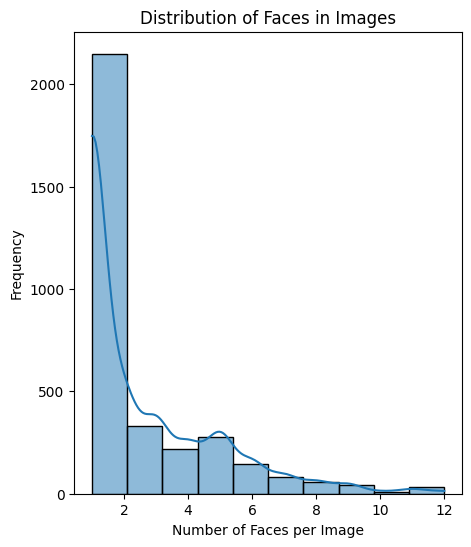

In [ ]:
# no of faces per image
anot["face_count"] = anot.groupby("image_name")["image_name"].transform("count")

# Create a figure and axis
fig, ax = plt.subplots(figsize=(5, 6))

# Plot histogram
sns.histplot(x=anot["face_count"], bins=10, kde=True, ax=ax)

# Add labels
ax.set_xlabel("Number of Faces per Image")
ax.set_ylabel("Frequency")
ax.set_title("Distribution of Faces in Images")

plt.show()


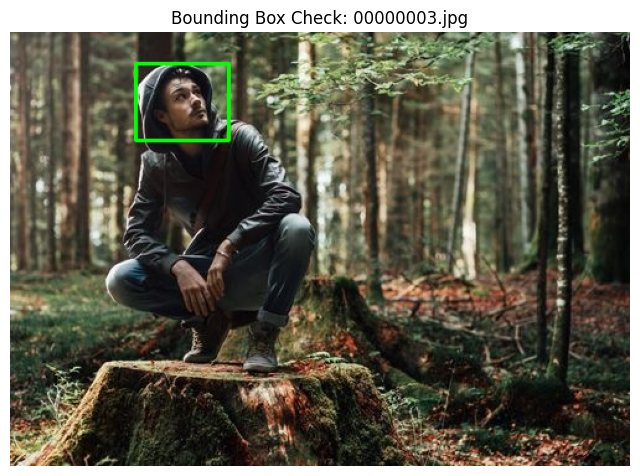

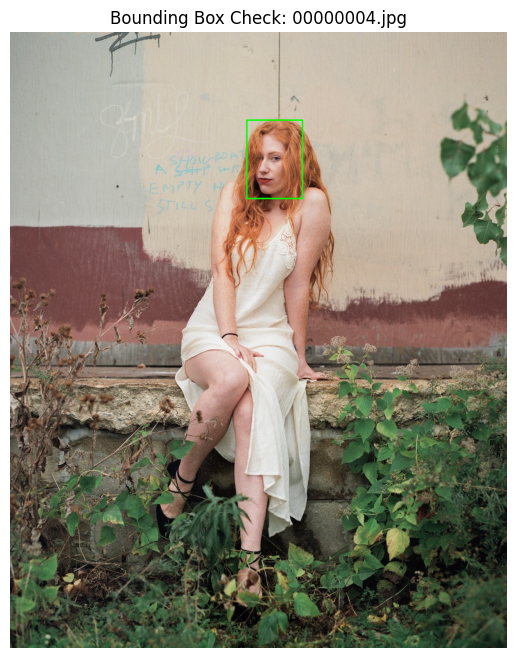

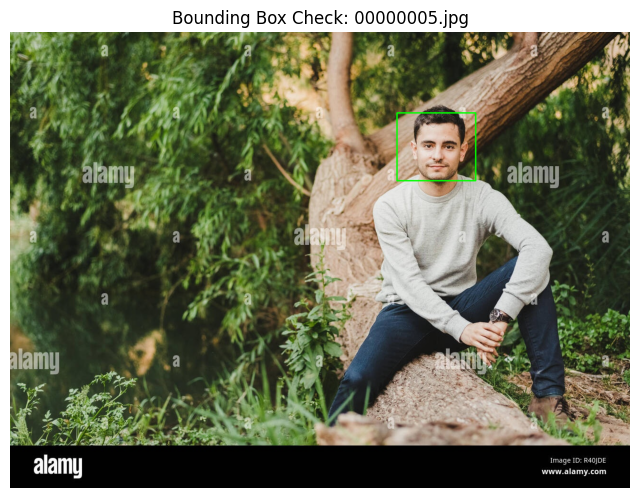

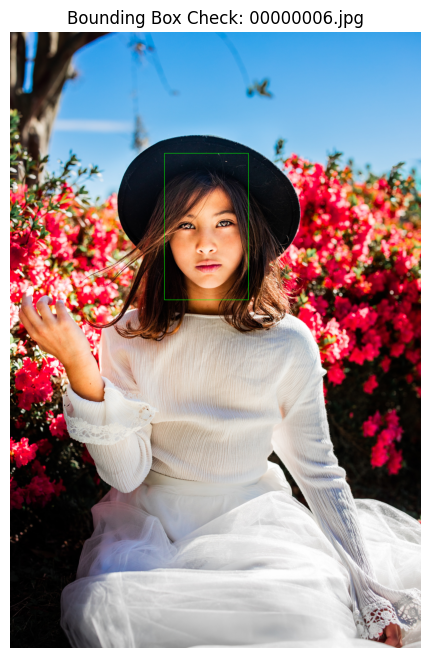

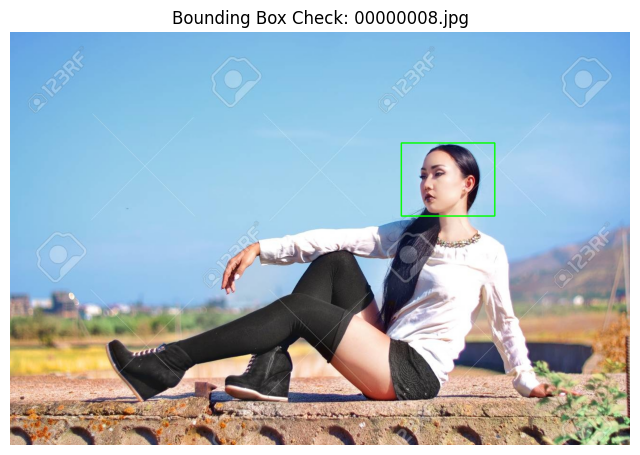

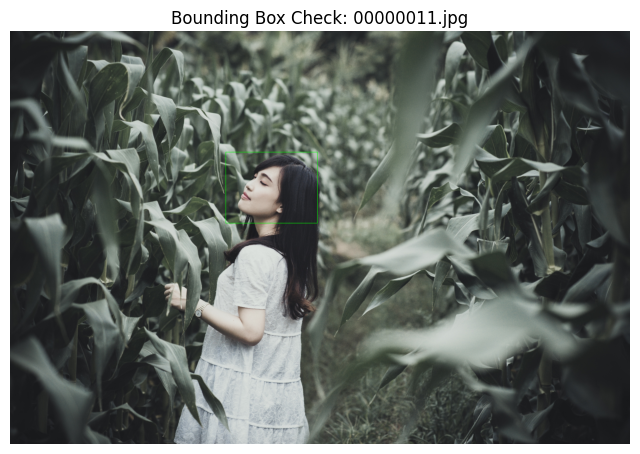

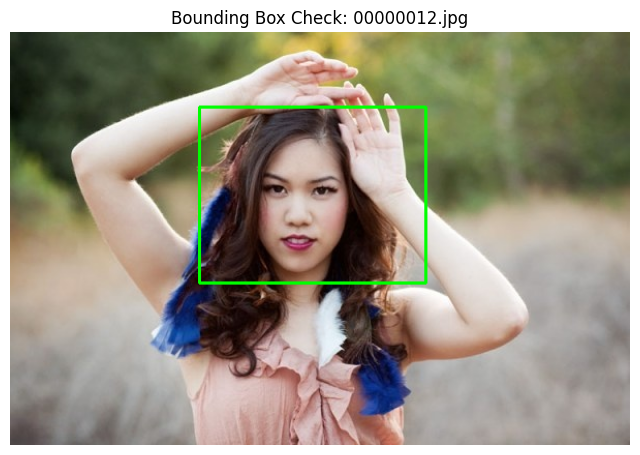

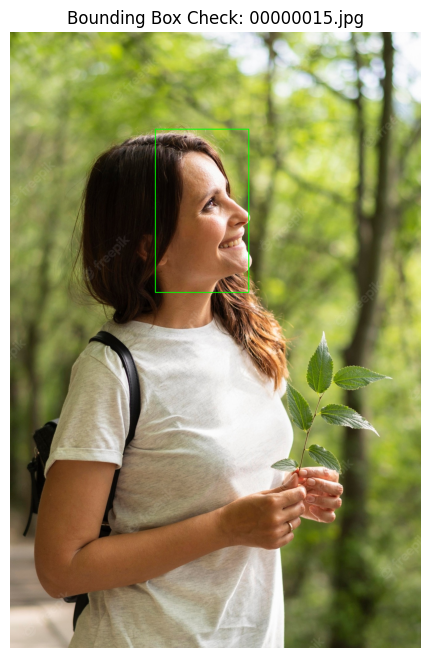

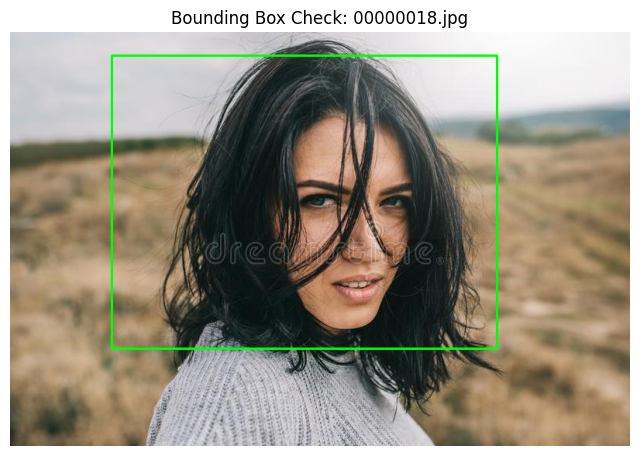

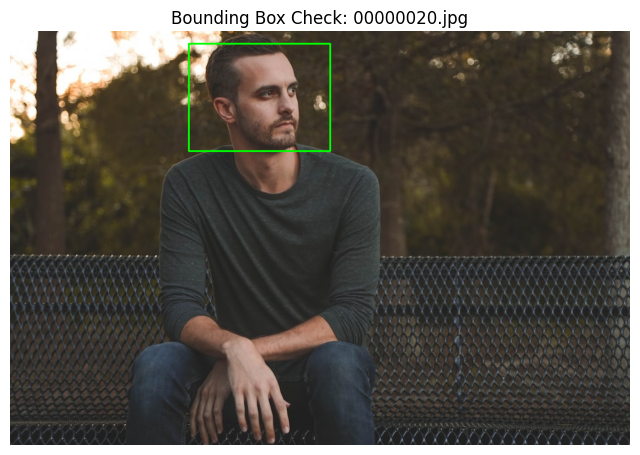

In [ ]:
# Check if bounding boxes are correctly placed around faces.
group_the_annotation=anot.groupby("image_name")
unique_images = list(group_the_annotation.groups.keys())[:10]

for img_name in unique_images:
    img_path = os.path.join(images, img_name)
    image = cv2.imread(img_path)

    if image is None:
        print(f"Image {image_name} not found!")
        continue
    image_data = group_the_annotation.get_group(img_name)

    for _, row in image_data.iterrows():
        x0, y0, x1, y1 = row["x0"], row["y0"], row["x1"], row["y1"]

        # Draw bounding box
        cv2.rectangle(image, (int(x0), int(y0)), (int(x1), int(y1)), (0, 255, 0), 2)

    # Show image
    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title(f"Bounding Box Check: {img_name}")
    plt.show()

In [ ]:
# Paths
csv_file = "/content/drive/MyDrive/project mini/Human Face Detection/annotation.csv"
yolo_labels_folder = "/content/drive/MyDrive/project mini/Human Face Detection/dataset/labels"
os.makedirs(yolo_labels_folder, exist_ok=True)

# Load CSV and drop missing values
df = pd.read_csv(csv_file).dropna()

# Define class mapping
class_mapping = {"face": 0}  # Add more classes if needed

# Convert annotations to YOLO format
for image_name, group in df.groupby("image_name"):
    yolo_label_path = os.path.join(yolo_labels_folder, f"{os.path.splitext(image_name)[0]}.txt")

    with open(yolo_label_path, "w") as f:
        for _, row in group.iterrows():
            width, height = row["width"], row["height"]
            x0, y0, x1, y1, class_name = row["x0"], row["y0"], row["x1"], row["y1"], row["class_labels"]

            # Validate class name
            if class_name not in class_mapping:
                print(f"Warning: Unrecognized class '{class_name}' in {image_name}")
                continue

            # Convert to YOLO format
            x_center = (x0 + x1) / (2 * width)
            y_center = (y0 + y1) / (2 * height)
            bbox_width = (x1 - x0) / width
            bbox_height = (y1 - y0) / height
            class_id = class_mapping[class_name]

            # Write to YOLO annotation file
            f.write(f"{class_id} {x_center} {y_center} {bbox_width} {bbox_height}\n")

    print(f"Processed: {image_name}")

# Check output label files
label_files = os.listdir(yolo_labels_folder)
print(f"Total label files created: {len(label_files)}")


Processed: 00000003.jpg
Processed: 00000004.jpg
Processed: 00000005.jpg
Processed: 00000006.jpg
Processed: 00000008.jpg
Processed: 00000011.jpg
Processed: 00000012.jpg
Processed: 00000015.jpg
Processed: 00000018.jpg
Processed: 00000020.jpg
Processed: 00000022.jpg
Processed: 00000023.jpg
Processed: 00000024.jpg
Processed: 00000026.jpg
Processed: 00000031.jpg
Processed: 00000032.jpg
Processed: 00000041.jpg
Processed: 00000044.jpg
Processed: 00000045.jpg
Processed: 00000047.jpg
Processed: 00000050.jpg
Processed: 00000051.jpg
Processed: 00000055.jpg
Processed: 00000058.jpg
Processed: 00000061.jpg
Processed: 00000067.jpg
Processed: 00000068.jpg
Processed: 00000069.jpg
Processed: 00000072.jpg
Processed: 00000074.jpg
Processed: 00000075.jpg
Processed: 00000077.jpg
Processed: 00000082.jpg
Processed: 00000085.jpg
Processed: 00000086.jpg
Processed: 00000087.jpg
Processed: 00000088.jpg
Processed: 00000089.jpg
Processed: 00000091.jpg
Processed: 00000094.jpg
Processed: 00000095.jpg
Processed: 00000

In [ ]:
# Define dataset paths
base_dir = "/content/drive/MyDrive/project mini/Human Face Detection/dataset"
image_dir = os.path.join(base_dir, "/content/drive/MyDrive/project mini/Human Face Detection/dataset/imagesn")
label_dir = os.path.join(base_dir, "/content/drive/MyDrive/project mini/Human Face Detection/dataset/labels")

# Create train and val directories
for subdir in ["train", "val"]:
    os.makedirs(os.path.join(image_dir, subdir), exist_ok=True)
    os.makedirs(os.path.join(label_dir, subdir), exist_ok=True)

print("Dataset structure created successfully!")


Dataset structure created successfully!


In [ ]:
import os
import shutil
import random
from glob import glob

image_dir =  "/content/drive/MyDrive/project mini/Human Face Detection/dataset/imagesn"
label_dir = "/content/drive/MyDrive/project mini/Human Face Detection/dataset/labels"

# Define destination paths
train_img_dir = os.path.join(image_dir, "train")
val_img_dir = os.path.join(image_dir, "val")
train_lbl_dir = os.path.join(label_dir, "train")
val_lbl_dir = os.path.join(label_dir, "val")

# Ensure train/val directories exist
os.makedirs(train_img_dir, exist_ok=True)
os.makedirs(val_img_dir, exist_ok=True)
os.makedirs(train_lbl_dir, exist_ok=True)
os.makedirs(val_lbl_dir, exist_ok=True)

# Get all image files
image_files = glob(os.path.join(image_dir, "*.jpg"))  # Adjust extension if needed
random.shuffle(image_files)  # Shuffle dataset for randomness

# Split dataset (e.g., 80% train, 20% val)
split_ratio = 0.8
split_index = int(len(image_files) * split_ratio)

train_files = image_files[:split_index]
val_files = image_files[split_index:]

# Move images and corresponding labels
for img_path in train_files:
    img_name = os.path.basename(img_path)
    label_name = os.path.splitext(img_name)[0] + ".txt"  # Corresponding label file

    # Move image
    shutil.move(img_path, os.path.join(train_img_dir, img_name))

    # Move label (if it exists)
    label_path = os.path.join(label_dir, label_name)
    if os.path.exists(label_path):
        shutil.move(label_path, os.path.join(train_lbl_dir, label_name))

for img_path in val_files:
    img_name = os.path.basename(img_path)
    label_name = os.path.splitext(img_name)[0] + ".txt"  # Corresponding label file

    # Move image
    shutil.move(img_path, os.path.join(val_img_dir, img_name))

    # Move label (if it exists)
    label_path = os.path.join(label_dir, label_name)
    if os.path.exists(label_path):
        shutil.move(label_path, os.path.join(val_lbl_dir, label_name))

print(f"Train images: {len(os.listdir(train_img_dir))}, Train labels: {len(os.listdir(train_lbl_dir))}")
print(f"Validation images: {len(os.listdir(val_img_dir))}, Validation labels: {len(os.listdir(val_lbl_dir))}")
print("Dataset successfully split into train and val!")


Train images: 1763, Train labels: 1763
Validation images: 441, Validation labels: 441
Dataset successfully split into train and val!


In [ ]:
from ultralytics import YOLO
import pandas as pd

# Load the model
model = YOLO("yolov8s.pt")
# train the model
results =model.train(
    data="/content/drive/MyDrive/project mini/Human Face Detection/dataset/file.yaml",
    epochs=100,
    batch=16,
    imgsz=800,
    device=0,
    # resume=True,
    hsv_h=0.015,
    hsv_s=0.7,
    hsv_v=0.4,
    flipud=0.0,
    fliplr=0.5,
    project="runs/detect",
    name="train_run",
    conf=0.4,
    val=True,
    optimizer ='AdamW',
    cos_lr=False,
    dropout=0.2,
    lr0=0.01,                  # Initial learning rate (adjustable)
    lrf=0.1,                   # Final learning rate (0.1 is a good starting point)
    momentum=0.937,             # Momentum for the optimizer
    weight_decay=0.02,        # Weight decay (regularization)
    warmup_epochs=3,           # Warm-up epochs to adjust the learning rate gradually
    warmup_momentum=0.8,       # Momentum during warm-up
    warmup_bias_lr=0.1         # Bias learning rate during warm-up
)


# Load the training results (CSV log)
log_path = "/content/runs/detect/train_run/results.csv"
df = pd.read_csv(log_path)

last_row = df.iloc[-1]
print("\n Final Epoch Results:")
print(f" Final Train Loss: {last_row['train/box_loss']:.4f}")
print(f" Final Val Loss: {last_row['val/box_loss']:.4f}")
print(f" mAP@50: {last_row['metrics/mAP50(B)']:.4f}")
print(f" mAP@50-95: {last_row['metrics/mAP50-95(B)']:.4f}")
print(f" Precision: {last_row['metrics/precision(B)']:.4f}")
print(f" Recall: {last_row['metrics/recall(B)']:.4f}")

# # Print the results for each epoch
# for index, row in df.iterrows():
#     print(f"Epoch {int(row['epoch']) + 1}:")
#     print(f" Train Loss: {row['train/box_loss']:.4f}")
#     print(f" Val Loss: {row['val/box_loss']:.4f}")
#     print(f" mAP@50: {row['metrics/mAP50(B)']:.4f}")
#     print(f" mAP@50-95: {row['metrics/mAP50-95(B)']:.4f}")
#     print(f" Precision: {row['metrics/precision(B)']:.4f}")
#     print(f" Recall: {row['metrics/recall(B)']:.4f}")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 21.5M/21.5M [00:00<00:00, 283MB/s]


Ultralytics 8.3.112 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/project mini/Human Face Detection/dataset/file.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=0, workers=8, project=runs/detect, name=train_run, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.2, val=True, split=val, save_json=False, conf=0.4, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_

100%|██████████| 755k/755k [00:00<00:00, 34.9MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

 22        [15, 18, 21]  1   2116435  ultralytics.nn.modules.head.Detect           [1, [128, 256, 512]]          
Model summary: 129 layers, 11,135,987 parameters, 11,135,971 gradients, 28.6 GFLOPs

Transferred 349/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 158MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.5±0.2 ms, read: 0.3±0.2 MB/s, size: 148.2 KB)


train: Scanning /content/drive/MyDrive/project mini/Human Face Detection/dataset/labels/train... 1763 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1763/1763 [14:19<00:00,  2.05it/s]


train: New cache created: /content/drive/MyDrive/project mini/Human Face Detection/dataset/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.6±0.2 ms, read: 0.2±0.0 MB/s, size: 102.3 KB)


val: Scanning /content/drive/MyDrive/project mini/Human Face Detection/dataset/labels/val... 441 images, 0 backgrounds, 0 corrupt: 100%|██████████| 441/441 [03:29<00:00,  2.10it/s]

val: New cache created: /content/drive/MyDrive/project mini/Human Face Detection/dataset/labels/val.cache


Plotting labels to runs/detect/train_run/labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.02), 63 bias(decay=0.0)
Image sizes 800 train, 800 val
Using 2 dataloader workers
Logging results to runs/detect/train_run
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      5.66G      1.538      2.453      1.741          8        800: 100%|██████████| 111/111 [01:01<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.71it/s]


                   all        441        714     0.0106      0.522    0.00832    0.00288

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      6.87G      1.421      1.867      1.654          8        800: 100%|██████████| 111/111 [00:58<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.07it/s]

                   all        441        714       0.18      0.213     0.0924     0.0375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100       6.9G       1.31       1.77       1.58          5        800: 100%|██████████| 111/111 [01:01<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.98it/s]

                   all        441        714       0.42      0.388      0.361      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      6.94G      1.291      1.729      1.579         11        800: 100%|██████████| 111/111 [00:58<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.77it/s]

                   all        441        714      0.525        0.6      0.495      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      6.97G      1.211      1.688      1.513          6        800: 100%|██████████| 111/111 [00:58<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.17it/s]

                   all        441        714      0.642      0.655      0.589      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      6.99G      1.126      1.573      1.486          6        800: 100%|██████████| 111/111 [00:58<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.80it/s]

                   all        441        714      0.572      0.675       0.54      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      7.04G      1.095      1.577      1.445          5        800: 100%|██████████| 111/111 [00:59<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.63it/s]

                   all        441        714      0.622      0.597       0.54      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      7.08G      1.112      1.587      1.465         13        800: 100%|██████████| 111/111 [00:57<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.18it/s]

                   all        441        714      0.664      0.508      0.501      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      7.12G      1.128      1.594      1.466          6        800: 100%|██████████| 111/111 [00:57<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.75it/s]

                   all        441        714      0.679      0.658      0.587      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      7.14G      1.038      1.504      1.415          4        800: 100%|██████████| 111/111 [00:58<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.81it/s]

                   all        441        714       0.67      0.661      0.587      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      7.19G      1.046      1.539      1.416          4        800: 100%|██████████| 111/111 [00:57<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.16it/s]

                   all        441        714      0.691      0.636      0.583      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      7.22G      1.016      1.548      1.417          3        800: 100%|██████████| 111/111 [01:01<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.85it/s]

                   all        441        714      0.719      0.602      0.605      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      7.26G     0.9635       1.49      1.369          5        800: 100%|██████████| 111/111 [00:58<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.81it/s]

                   all        441        714       0.69      0.647      0.584      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      7.29G     0.9616      1.441      1.373         10        800: 100%|██████████| 111/111 [00:57<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.09it/s]

                   all        441        714       0.69      0.623      0.584      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      7.34G     0.9626      1.444      1.371          5        800: 100%|██████████| 111/111 [00:57<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.68it/s]

                   all        441        714      0.686      0.657      0.599      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      7.37G     0.9631      1.439      1.368         19        800: 100%|██████████| 111/111 [01:00<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.91it/s]

                   all        441        714      0.691      0.682      0.617      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      5.76G     0.9214      1.366      1.344          5        800: 100%|██████████| 111/111 [00:57<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.12it/s]

                   all        441        714      0.679      0.662      0.605      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      6.91G     0.9411      1.422      1.372         10        800: 100%|██████████| 111/111 [00:57<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.70it/s]

                   all        441        714      0.674      0.683      0.626      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      6.91G     0.9011      1.423      1.344          8        800: 100%|██████████| 111/111 [00:57<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.08it/s]

                   all        441        714      0.692      0.633      0.568      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      6.91G     0.9217      1.435      1.362          6        800: 100%|██████████| 111/111 [00:56<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.84it/s]

                   all        441        714      0.691      0.702       0.63      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      6.91G     0.9274      1.352      1.353          7        800: 100%|██████████| 111/111 [00:58<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.77it/s]

                   all        441        714      0.698      0.699      0.619       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      6.91G     0.8935      1.373      1.325          4        800: 100%|██████████| 111/111 [00:57<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.16it/s]

                   all        441        714      0.686      0.694       0.63      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      6.91G     0.8879      1.352      1.328          5        800: 100%|██████████| 111/111 [00:57<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.82it/s]

                   all        441        714      0.691      0.696      0.626      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      6.95G     0.9067       1.39      1.345          7        800: 100%|██████████| 111/111 [00:57<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.82it/s]

                   all        441        714      0.696      0.685      0.606      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      6.98G     0.8669      1.381      1.317          8        800: 100%|██████████| 111/111 [00:58<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.96it/s]

                   all        441        714      0.682        0.7      0.625      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      7.01G     0.8542      1.341      1.323         14        800: 100%|██████████| 111/111 [00:57<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.81it/s]

                   all        441        714      0.698        0.7      0.614      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      7.05G     0.8716       1.39      1.321          4        800: 100%|██████████| 111/111 [00:57<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.11it/s]

                   all        441        714      0.698      0.686      0.601      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      7.09G      0.827      1.332      1.291          8        800: 100%|██████████| 111/111 [00:57<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.76it/s]

                   all        441        714      0.698      0.702      0.636      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      7.12G     0.8466      1.358      1.309         19        800: 100%|██████████| 111/111 [00:57<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.82it/s]

                   all        441        714      0.691      0.692      0.616      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      7.15G      0.833      1.318      1.302         10        800: 100%|██████████| 111/111 [00:59<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.04it/s]

                   all        441        714      0.694        0.7      0.604      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100       7.2G     0.8113      1.264      1.276          8        800: 100%|██████████| 111/111 [00:57<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.71it/s]

                   all        441        714      0.697      0.698      0.609      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      7.23G     0.8387      1.359      1.312          6        800: 100%|██████████| 111/111 [00:57<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.91it/s]

                   all        441        714      0.699      0.702      0.626      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      7.27G      0.834      1.343      1.308         10        800: 100%|██████████| 111/111 [00:57<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.91it/s]

                   all        441        714      0.694      0.692      0.629      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      7.29G     0.8374      1.334      1.314          5        800: 100%|██████████| 111/111 [00:58<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.71it/s]

                   all        441        714      0.699      0.702      0.623      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      7.34G     0.8207      1.348      1.293          5        800: 100%|██████████| 111/111 [00:58<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.94it/s]

                   all        441        714      0.697      0.704      0.644      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      7.38G     0.7801      1.291      1.266         16        800: 100%|██████████| 111/111 [00:58<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.06it/s]

                   all        441        714      0.695      0.699      0.628      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100       5.8G     0.8164      1.349      1.292          3        800: 100%|██████████| 111/111 [00:57<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.82it/s]

                   all        441        714      0.691      0.686      0.601      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      6.96G     0.8249      1.314      1.311          7        800: 100%|██████████| 111/111 [00:58<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.04it/s]

                   all        441        714      0.689      0.698      0.623      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      6.96G     0.7779      1.303      1.254          5        800: 100%|██████████| 111/111 [00:59<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.74it/s]

                   all        441        714      0.693        0.7      0.637      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      6.96G     0.8137      1.328       1.29          7        800: 100%|██████████| 111/111 [00:57<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.91it/s]

                   all        441        714      0.693        0.7      0.611      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      6.96G     0.7894      1.287      1.275         10        800: 100%|██████████| 111/111 [00:58<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.07it/s]

                   all        441        714      0.692        0.7      0.646      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      6.96G      0.807      1.324      1.284         11        800: 100%|██████████| 111/111 [00:57<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.77it/s]

                   all        441        714      0.705      0.682      0.636      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      6.96G     0.7698      1.254      1.271          7        800: 100%|██████████| 111/111 [00:58<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.06it/s]

                   all        441        714      0.699        0.7      0.605      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      6.96G     0.8129      1.331        1.3          3        800: 100%|██████████| 111/111 [00:58<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.13it/s]

                   all        441        714      0.697      0.704      0.637      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      6.96G      0.772      1.272      1.263          5        800: 100%|██████████| 111/111 [00:57<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.78it/s]

                   all        441        714      0.689      0.702      0.629      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      6.99G     0.7836      1.299      1.277          9        800: 100%|██████████| 111/111 [00:56<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.14it/s]

                   all        441        714      0.699      0.704      0.647      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      7.04G     0.7463      1.265      1.247          4        800: 100%|██████████| 111/111 [00:59<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.61it/s]

                   all        441        714      0.689      0.697      0.616      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      7.08G      0.768      1.249      1.274          9        800: 100%|██████████| 111/111 [00:56<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.78it/s]

                   all        441        714      0.701      0.703      0.635      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      7.11G     0.7513      1.284      1.244         16        800: 100%|██████████| 111/111 [00:57<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.16it/s]

                   all        441        714      0.685        0.7      0.641      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      7.13G     0.7649      1.266      1.271          4        800: 100%|██████████| 111/111 [01:03<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.09it/s]

                   all        441        714      0.703      0.703       0.64      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      7.18G     0.7552       1.26      1.252          6        800: 100%|██████████| 111/111 [00:57<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.74it/s]

                   all        441        714      0.697      0.702      0.621      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      7.22G     0.7452      1.277      1.244         29        800: 100%|██████████| 111/111 [00:58<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.01it/s]

                   all        441        714      0.699      0.704      0.644      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      7.25G     0.7741      1.287      1.274         16        800: 100%|██████████| 111/111 [00:56<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.78it/s]

                   all        441        714        0.7      0.704      0.638      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      7.28G     0.7649      1.264      1.258          9        800: 100%|██████████| 111/111 [00:58<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.90it/s]

                   all        441        714      0.701      0.704       0.65      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      7.33G     0.7533      1.274      1.264          9        800: 100%|██████████| 111/111 [00:57<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.09it/s]

                   all        441        714      0.701      0.707      0.652      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      7.36G     0.7309      1.242      1.247          7        800: 100%|██████████| 111/111 [00:58<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.79it/s]

                   all        441        714      0.707      0.706      0.646      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100       7.4G     0.7725      1.288       1.27          6        800: 100%|██████████| 111/111 [00:57<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.21it/s]

                   all        441        714      0.702      0.702      0.645        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      5.79G       0.72      1.235      1.243          7        800: 100%|██████████| 111/111 [00:57<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.79it/s]

                   all        441        714      0.698      0.706      0.643      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      6.95G     0.7217      1.275      1.245          5        800: 100%|██████████| 111/111 [00:57<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.01it/s]

                   all        441        714      0.701      0.706      0.642      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      6.95G      0.736      1.265      1.255         14        800: 100%|██████████| 111/111 [00:57<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.02it/s]

                   all        441        714      0.703      0.702      0.649      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      6.95G     0.7542      1.266      1.246         13        800: 100%|██████████| 111/111 [00:58<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.74it/s]

                   all        441        714      0.697      0.705      0.646      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      6.95G     0.7459      1.241      1.264          8        800: 100%|██████████| 111/111 [00:57<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.13it/s]

                   all        441        714      0.705      0.702      0.625      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      6.95G     0.7414      1.286      1.254          4        800: 100%|██████████| 111/111 [00:57<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.67it/s]

                   all        441        714      0.703      0.701      0.647        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      6.95G     0.6816      1.185      1.214         11        800: 100%|██████████| 111/111 [00:57<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.03it/s]

                   all        441        714      0.703      0.704      0.645       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      6.95G     0.7116      1.249      1.233          4        800: 100%|██████████| 111/111 [00:58<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.09it/s]

                   all        441        714      0.703      0.703      0.647      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      6.96G     0.6907      1.236      1.215          4        800: 100%|██████████| 111/111 [00:57<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.80it/s]

                   all        441        714      0.701      0.704      0.639      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      7.01G     0.7288      1.253      1.242          7        800: 100%|██████████| 111/111 [00:56<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.03it/s]

                   all        441        714      0.702      0.709      0.652      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      7.04G     0.7039      1.182      1.223          3        800: 100%|██████████| 111/111 [00:56<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.78it/s]

                   all        441        714      0.701      0.704       0.63      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      7.08G     0.6843      1.192      1.215          9        800: 100%|██████████| 111/111 [00:56<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.09it/s]

                   all        441        714      0.701      0.703      0.632      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100       7.1G     0.7232      1.269      1.247          6        800: 100%|██████████| 111/111 [00:56<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.73it/s]

                   all        441        714      0.701      0.703      0.644      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      7.15G      0.711       1.22      1.239         10        800: 100%|██████████| 111/111 [00:56<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.81it/s]

                   all        441        714      0.705      0.707      0.654      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      7.19G     0.7347      1.245      1.252          9        800: 100%|██████████| 111/111 [00:57<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.12it/s]

                   all        441        714      0.708      0.706      0.647      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      7.23G     0.6725      1.201      1.216          5        800: 100%|██████████| 111/111 [00:57<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.77it/s]

                   all        441        714      0.704      0.706      0.651      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      7.25G     0.6833      1.216      1.214          4        800: 100%|██████████| 111/111 [00:57<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.11it/s]

                   all        441        714      0.698      0.704      0.627      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100       7.3G     0.7268      1.264       1.24          8        800: 100%|██████████| 111/111 [00:57<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.87it/s]

                   all        441        714      0.707      0.707      0.654      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      7.33G     0.6846      1.223      1.223         13        800: 100%|██████████| 111/111 [00:57<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.80it/s]

                   all        441        714      0.705      0.704      0.654      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      7.38G     0.6649      1.172      1.203          8        800: 100%|██████████| 111/111 [00:57<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.13it/s]

                   all        441        714      0.708       0.71      0.656      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      5.84G     0.7019      1.219      1.231         22        800: 100%|██████████| 111/111 [00:59<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.70it/s]

                   all        441        714      0.697      0.704      0.646      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      6.99G     0.6741      1.165      1.212          9        800: 100%|██████████| 111/111 [00:57<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.83it/s]

                   all        441        714      0.706      0.709      0.654      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      6.99G     0.6582      1.182      1.205          9        800: 100%|██████████| 111/111 [00:56<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.06it/s]

                   all        441        714      0.703      0.706       0.65      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      6.99G     0.6623      1.161      1.212          3        800: 100%|██████████| 111/111 [00:56<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.72it/s]

                   all        441        714      0.709      0.711      0.655      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      6.99G     0.7166      1.273      1.239          5        800: 100%|██████████| 111/111 [00:57<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.03it/s]

                   all        441        714      0.703      0.709      0.646       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      6.99G     0.6633       1.17      1.215          2        800: 100%|██████████| 111/111 [00:58<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.75it/s]

                   all        441        714      0.706      0.707      0.652      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      6.99G     0.6615       1.18      1.204          6        800: 100%|██████████| 111/111 [00:57<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.78it/s]

                   all        441        714      0.711      0.713      0.655      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      6.99G     0.6603      1.198      1.221          8        800: 100%|██████████| 111/111 [00:57<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.14it/s]

                   all        441        714      0.705      0.707      0.637      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      6.99G     0.6748      1.214      1.224          4        800: 100%|██████████| 111/111 [00:57<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.80it/s]

                   all        441        714      0.708      0.709      0.658      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      7.04G     0.6691      1.192      1.222          7        800: 100%|██████████| 111/111 [00:59<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.95it/s]

                   all        441        714      0.705      0.704      0.649      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      7.07G     0.6483      1.198      1.202          6        800: 100%|██████████| 111/111 [00:57<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.00it/s]

                   all        441        714      0.707      0.707      0.654      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      7.11G     0.6735      1.204       1.22          9        800: 100%|██████████| 111/111 [00:57<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.82it/s]

                   all        441        714      0.705       0.71      0.655      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      7.13G     0.6705      1.203      1.214          5        800: 100%|██████████| 111/111 [00:57<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.17it/s]

                   all        441        714      0.704      0.706      0.655      0.498


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      7.18G     0.6071      1.174      1.195         12        800: 100%|██████████| 111/111 [00:58<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.56it/s]

                   all        441        714      0.708      0.709      0.659      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      7.21G     0.6055      1.172      1.195          3        800: 100%|██████████| 111/111 [00:55<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.06it/s]

                   all        441        714      0.703      0.704      0.647      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      7.25G     0.5942      1.147       1.18          3        800: 100%|██████████| 111/111 [00:54<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.75it/s]

                   all        441        714      0.708      0.706      0.658      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      7.28G     0.5944      1.169      1.174          7        800: 100%|██████████| 111/111 [00:55<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.19it/s]

                   all        441        714       0.71      0.706      0.666      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      7.32G     0.5921       1.16      1.178          3        800: 100%|██████████| 111/111 [00:55<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.91it/s]

                   all        441        714      0.709      0.707      0.665      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      7.36G     0.5788      1.145      1.169          4        800: 100%|██████████| 111/111 [00:56<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.08it/s]

                   all        441        714      0.712       0.71      0.675      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100       7.4G     0.5764      1.131      1.167          3        800: 100%|██████████| 111/111 [00:54<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.97it/s]

                   all        441        714       0.71      0.709      0.649      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      5.79G     0.5791      1.143      1.169          4        800: 100%|██████████| 111/111 [00:54<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.97it/s]

                   all        441        714      0.707      0.709      0.669      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      6.95G     0.5658      1.126      1.159          6        800: 100%|██████████| 111/111 [00:54<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.20it/s]

                   all        441        714      0.708      0.707      0.668      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      6.95G     0.5691      1.125      1.158          6        800: 100%|██████████| 111/111 [00:54<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.82it/s]

                   all        441        714      0.711      0.709      0.665      0.502



100 epochs completed in 1.831 hours.
Optimizer stripped from runs/detect/train_run/weights/last.pt, 22.6MB
Optimizer stripped from runs/detect/train_run/weights/best.pt, 22.6MB

Validating runs/detect/train_run/weights/best.pt...
Ultralytics 8.3.112 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.30it/s]


                   all        441        714      0.711       0.71      0.675      0.511
Speed: 0.5ms preprocess, 7.2ms inference, 0.0ms loss, 4.7ms postprocess per image
Results saved to runs/detect/train_run

 Final Epoch Results:
 Final Train Loss: 0.5691
 Final Val Loss: 0.6060
 mAP@50: 0.6651
 mAP@50-95: 0.5024
 Precision: 0.7107
 Recall: 0.7087



0: 544x800 1 face, 2169.9ms
Speed: 19.2ms preprocess, 2169.9ms inference, 1.9ms postprocess per image at shape (1, 3, 544, 800)
Results saved to runs/detect/predict4


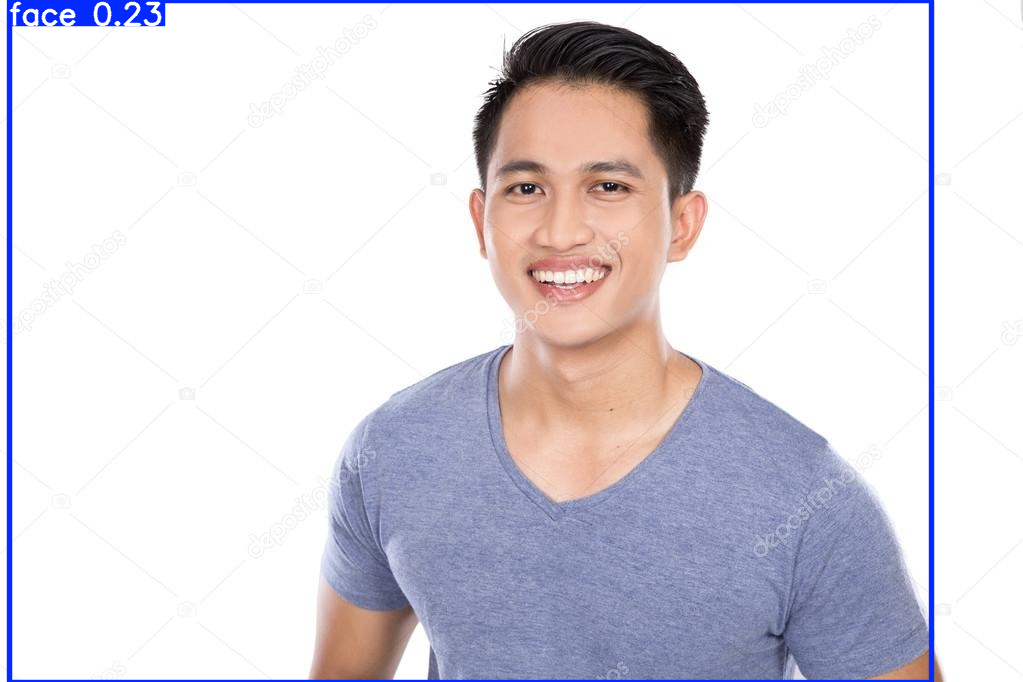

In [ ]:
from ultralytics import YOLO
from PIL import Image

# Load model
model = YOLO("/content/drive/MyDrive/project mini/Human Face Detection/runs/detect/train_run/weights/best.pt")

# Load image
image = Image.open("/content/drive/MyDrive/project mini/Human Face Detection/original_images/images/00001693.jpg").convert("RGB")

# Predict and save result
results = model.predict(image, save=True, conf=0.01)

results[0].show()


0: 800x576 1 face, 4099.1ms
Speed: 9.1ms preprocess, 4099.1ms inference, 4.0ms postprocess per image at shape (1, 3, 800, 576)
Results saved to runs/detect/predict4


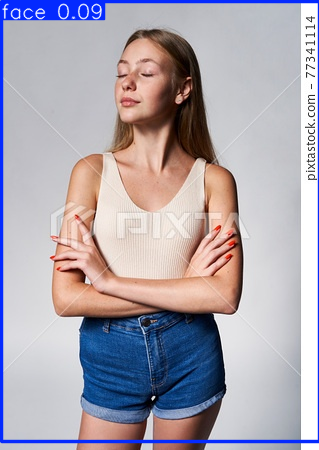

In [ ]:
# Load image
image = Image.open("/content/drive/MyDrive/project mini/Human Face Detection/original_images/images/00001694.jpg").convert("RGB")

# Predict and save result
results = model.predict(image, save=True, conf=0.01)

results[0].show()

In [13]:
from ultralytics import YOLO
import pandas as pd

# Load the model
model = YOLO("/content/drive/MyDrive/project mini/Human Face Detection/yolov8n-face.pt")
# train the model
results =model.train(
    data="/content/drive/MyDrive/project mini/Human Face Detection/dataset/file.yaml",
    epochs=40,
    batch=16,
    imgsz=800,
    project="runs/detect",
    name="train_run",
    optimizer ='AdamW',
    cos_lr=False,
    dropout=0.1,
    lr0=0.01,                  # Initial learning rate (adjustable)
    lrf=0.1,
)

log_path = "/content/runs/detect/train_run4/results.csv"
df = pd.read_csv(log_path)

last_row = df.iloc[-1]
print("\n Final Epoch Results:")
print(f" Final Train Loss: {last_row['train/box_loss']:.4f}")
print(f" Final Val Loss: {last_row['val/box_loss']:.4f}")
print(f" mAP@50: {last_row['metrics/mAP50(B)']:.4f}")
print(f" mAP@50-95: {last_row['metrics/mAP50-95(B)']:.4f}")
print(f" Precision: {last_row['metrics/precision(B)']:.4f}")
print(f" Recall: {last_row['metrics/recall(B)']:.4f}")

Ultralytics 8.3.116 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/project mini/Human Face Detection/yolov8n-face.pt, data=/content/drive/MyDrive/project mini/Human Face Detection/dataset/file.yaml, epochs=40, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=runs/detect, name=train_run4, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.1, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fra

train: Scanning /content/drive/MyDrive/project mini/Human Face Detection/dataset/labels/train.cache... 1763 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1763/1763 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 1.1±1.0 ms, read: 18.1±13.3 MB/s, size: 102.3 KB)


val: Scanning /content/drive/MyDrive/project mini/Human Face Detection/dataset/labels/val.cache... 441 images, 0 backgrounds, 0 corrupt: 100%|██████████| 441/441 [00:00<?, ?it/s]


Plotting labels to runs/detect/train_run4/labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 800 train, 800 val
Using 2 dataloader workers
Logging results to runs/detect/train_run4
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40      3.23G      1.475      1.723      1.734          8        800: 100%|██████████| 111/111 [00:57<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.02it/s]

                   all        441        714       0.51      0.471       0.41      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40      3.94G      1.228       1.67      1.556          8        800: 100%|██████████| 111/111 [00:54<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.15it/s]

                   all        441        714      0.363      0.308      0.252      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40      3.94G      1.195      1.622       1.53          5        800: 100%|██████████| 111/111 [00:55<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.81it/s]

                   all        441        714      0.456      0.513      0.421      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/40      3.94G      1.148      1.592      1.505         11        800: 100%|██████████| 111/111 [00:55<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  2.00it/s]

                   all        441        714      0.605      0.629       0.52      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/40      3.94G      1.118      1.545      1.485          6        800: 100%|██████████| 111/111 [00:53<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.06it/s]

                   all        441        714      0.673      0.681      0.555       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/40      3.94G      1.031      1.469      1.446          6        800: 100%|██████████| 111/111 [00:53<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.79it/s]

                   all        441        714       0.66      0.674      0.573      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/40      3.94G      1.016      1.452      1.401          5        800: 100%|██████████| 111/111 [00:54<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.17it/s]

                   all        441        714      0.648      0.641      0.526      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/40      3.95G      0.983      1.427      1.393         13        800: 100%|██████████| 111/111 [00:55<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.98it/s]

                   all        441        714      0.695      0.695      0.559       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/40      3.95G       1.01      1.464      1.409          6        800: 100%|██████████| 111/111 [00:53<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.75it/s]

                   all        441        714      0.665      0.683      0.565      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/40      3.95G     0.9239      1.369      1.354          4        800: 100%|██████████| 111/111 [00:55<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.23it/s]

                   all        441        714      0.686      0.693      0.559      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/40      3.95G     0.9497      1.403      1.381          4        800: 100%|██████████| 111/111 [00:54<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.75it/s]

                   all        441        714      0.671      0.693      0.559      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/40      3.97G     0.9206      1.416      1.359          3        800: 100%|██████████| 111/111 [00:52<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.63it/s]

                   all        441        714      0.693      0.699      0.589      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/40      3.97G     0.8878      1.338      1.347          5        800: 100%|██████████| 111/111 [00:53<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.19it/s]

                   all        441        714      0.687      0.692       0.58      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/40      3.97G     0.9005      1.347      1.351         10        800: 100%|██████████| 111/111 [00:54<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.03it/s]

                   all        441        714      0.699      0.696      0.588      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/40      3.97G     0.8876      1.354       1.34          5        800: 100%|██████████| 111/111 [00:53<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.80it/s]

                   all        441        714      0.696      0.697      0.615      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/40      3.97G     0.8656      1.329      1.332         19        800: 100%|██████████| 111/111 [00:54<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.20it/s]

                   all        441        714      0.699      0.704      0.589      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/40      3.97G     0.8334      1.281       1.31          5        800: 100%|██████████| 111/111 [00:55<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.03it/s]

                   all        441        714      0.693      0.706      0.595      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/40      3.97G     0.8469      1.293      1.331         10        800: 100%|██████████| 111/111 [00:53<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.62it/s]

                   all        441        714      0.691      0.696      0.599      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/40      3.97G     0.8217      1.308      1.313          8        800: 100%|██████████| 111/111 [00:53<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.26it/s]

                   all        441        714      0.688      0.694      0.586      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/40      3.99G     0.8175      1.324      1.312          6        800: 100%|██████████| 111/111 [00:54<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.86it/s]

                   all        441        714      0.703      0.704      0.604      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/40      3.99G     0.8171      1.268      1.302          7        800: 100%|██████████| 111/111 [00:54<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.90it/s]

                   all        441        714      0.696      0.704      0.594      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/40      3.99G     0.7877      1.256      1.288          4        800: 100%|██████████| 111/111 [00:54<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.16it/s]

                   all        441        714      0.703      0.702       0.61      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/40      3.99G      0.774      1.254      1.285          5        800: 100%|██████████| 111/111 [00:54<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.75it/s]

                   all        441        714       0.69      0.698      0.598      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/40      3.99G     0.8045       1.29      1.307          7        800: 100%|██████████| 111/111 [00:52<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.63it/s]

                   all        441        714      0.697      0.703      0.589      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/40      3.99G      0.761      1.283      1.262          8        800: 100%|██████████| 111/111 [00:53<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.93it/s]

                   all        441        714      0.694      0.709      0.615      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/40      3.99G      0.755      1.227      1.276         14        800: 100%|██████████| 111/111 [00:54<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.88it/s]

                   all        441        714      0.697        0.7      0.595      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/40      3.99G     0.7468      1.275      1.262          4        800: 100%|██████████| 111/111 [00:53<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.81it/s]

                   all        441        714      0.699      0.703      0.599      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/40      3.99G     0.7301      1.237      1.257          8        800: 100%|██████████| 111/111 [00:54<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.20it/s]

                   all        441        714      0.705      0.701      0.605      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/40      3.99G     0.7338      1.242      1.261         19        800: 100%|██████████| 111/111 [00:54<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.82it/s]

                   all        441        714      0.703      0.703      0.597      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/40      3.99G     0.7226      1.221      1.258         10        800: 100%|██████████| 111/111 [00:52<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.83it/s]

                   all        441        714      0.697      0.701      0.598      0.407


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/40      3.99G     0.6925      1.213      1.257          4        800: 100%|██████████| 111/111 [00:52<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.25it/s]

                   all        441        714      0.704      0.707      0.622      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/40      3.99G     0.6997      1.195      1.276          5        800: 100%|██████████| 111/111 [00:50<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.25it/s]

                   all        441        714      0.705      0.707       0.62      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/40      3.99G     0.6767      1.191      1.262          9        800: 100%|██████████| 111/111 [00:50<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.31it/s]

                   all        441        714      0.703      0.704      0.622      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/40      3.99G      0.662      1.194       1.23          3        800: 100%|██████████| 111/111 [00:51<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.28it/s]

                   all        441        714        0.7      0.699      0.631      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/40      3.99G     0.6502      1.175      1.217          4        800: 100%|██████████| 111/111 [00:49<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.98it/s]

                   all        441        714      0.705      0.709      0.631      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/40      3.99G     0.6492      1.173      1.228          8        800: 100%|██████████| 111/111 [00:50<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.24it/s]

                   all        441        714      0.707      0.704      0.628      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/40      3.99G     0.6387       1.16      1.231          3        800: 100%|██████████| 111/111 [00:49<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.04it/s]

                   all        441        714      0.701      0.703      0.639      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/40      3.99G     0.6226      1.143      1.216          3        800: 100%|██████████| 111/111 [00:50<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.01it/s]

                   all        441        714      0.706      0.703       0.63       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/40      3.99G     0.6071      1.162      1.186          6        800: 100%|██████████| 111/111 [00:49<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  2.00it/s]

                   all        441        714      0.702      0.703      0.631      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/40      3.99G     0.6148      1.153      1.196          6        800: 100%|██████████| 111/111 [00:49<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.93it/s]

                   all        441        714      0.706      0.707      0.643      0.453



40 epochs completed in 0.680 hours.
Optimizer stripped from runs/detect/train_run4/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train_run4/weights/best.pt, 6.3MB

Validating runs/detect/train_run4/weights/best.pt...
Ultralytics 8.3.116 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.18it/s]


                   all        441        714      0.706      0.707      0.642      0.453
Speed: 0.4ms preprocess, 3.4ms inference, 0.0ms loss, 7.5ms postprocess per image
Results saved to runs/detect/train_run4

 Final Epoch Results:
 Final Train Loss: 0.6148
 Final Val Loss: 0.6487
 mAP@50: 0.6430
 mAP@50-95: 0.4531
 Precision: 0.7060
 Recall: 0.7073



0: 544x800 1 face, 9.1ms
Speed: 2.6ms preprocess, 9.1ms inference, 1.6ms postprocess per image at shape (1, 3, 544, 800)
Results saved to runs/detect/predict16


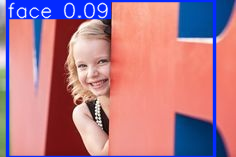

In [24]:
from ultralytics import YOLO
from PIL import Image
# Load model
model = YOLO("/content/runs/detect/train_run4/weights/best.pt")

# Load image
image = Image.open("/content/drive/MyDrive/project mini/Human Face Detection/original_images/images/00003513.jpg").convert("RGB")

# Predict and save result
results = model.predict(image, save=True, conf=0.01)

results[0].show()


0: 448x640 4 faces, 10.2ms
Speed: 2.3ms preprocess, 10.2ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict5


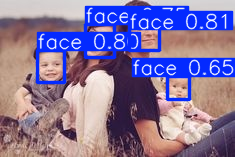

In [30]:
from ultralytics import YOLO
from PIL import Image
# Load model
model = YOLO("/content/drive/MyDrive/project mini/Human Face Detection/yolov8n-face.pt")

# Load image
image = Image.open("/content/drive/MyDrive/project mini/Human Face Detection/original_images/images/00003505.jpg").convert("RGB")

# Predict and save result
results = model.predict(image, save=True, conf=0.60)

results[0].show()

In [ ]:
import os

label_dir = "/content/drive/MyDrive/project mini/Human Face Detection/dataset/labels/train"  # or val/test
empty_files = []

for file in os.listdir(label_dir):
    if file.endswith(".txt"):
        file_path = os.path.join(label_dir, file)
        if os.stat(file_path).st_size == 0:
            empty_files.append(file)

print(f"Found {len(empty_files)} empty label files:", empty_files)


Found 0 empty label files: []


In [9]:
import os

image_dir = "D:/Desktop/Human Face Detection/dataset/images/train"
label_dir = "D:/Desktop/Human Face Detection/dataset/labels/train"

image_files = {f.replace('.jpg', '.txt') for f in os.listdir(image_dir) if f.endswith('.jpg')}
label_files = set(os.listdir(label_dir))

missing_labels = image_files - label_files
missing_images = label_files - image_files

print(f"misssing Labels: {len(missing_labels)}")
print(f"missing Images: {len(missing_images)}")

misssing Labels: 0
missing Images: 0


In [ ]:
import os

# Path to labels folder
labels = "/content/drive/MyDrive/project mini/Human Face Detection/dataset/labels"

# Counter for deleted files
deleted_count = 0

# Iterate through all files in the labels directory
for filename in os.listdir(labels):
    file_path = os.path.join(labels, filename)

    # Check if the file exists and is empty
    if os.path.isfile(file_path) and os.path.getsize(file_path) == 0:
        os.remove(file_path)  # Delete the empty file
        deleted_count += 1
        print(f"Deleted: {file_path}")

print(f"\nTotal empty files deleted: {deleted_count}")


Total empty files deleted: 0


In [ ]:
import os

labels = "/content/drive/MyDrive/project mini/Human Face Detection/dataset/labels/train"

for i in os.listdir(labels):
    file_path = os.path.join(labels, i)

    if os.path.getsize(file_path) == 0:  # If file is empty
        os.remove(file_path)
        print(f"deleted{file_path}")  # Delete it

In [ ]:
import shutil

label_source_dir = "D:/Desktop/Human Face Detection/dataset/labels"
label_target_dir = "D:/Desktop/Human Face Detection/dataset/labels/val"

for missing_label in missing_labels:
    src = f"{label_source_dir}/{missing_label}.txt"
    dest = f"{label_target_dir}/{missing_label}.txt"
    if os.path.exists(src):
        shutil.move(src, dest)


In [ ]:
for missing_label in missing_labels:
    label_path = f"{label_dir}/{missing_label}.txt"
    open(label_path, 'w').close()  # Creates an empty file
